# Problema 6
## Planteamiento
Determinar los patrones de consumo eléctrico en una casa es importante para poder determinar la cantidad de energía necesaria para suministrar en una ciudad. Es claro que el consumo eléctrico varía dependiendo de las estaciones y de las actividades que se realicen en la casa. Sin embargo, determinar los patrones si es posible determinar periodos demayor consumo y periodos de menor consumo podría ayudar a responder esta pregunta.

La problemática es estudiar la periodicidad de estos consumos al día y determinar si es posible predecir los periodos de mayor consumo y los periodos de menor consumo.

La base de datos asociada a este problema es: https://www.kaggle.com/datasets/vitthalmadane/energy-consumption-time-series-dataset


## Metodología

#### Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from ripser import ripser
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud


: 

Dentro de las instrucciones se menciona que se tiene que revisar la periodicidad de los consumos al dia, daré dos aproximaciones, la primera se basa en buscar periodicidad dentro de todos los datos, mientras que la segunda se basa en tomar los tiempos únicamente, primeramente iniciamos con la limpieza de datos 

#### Limpieza de Datos

In [ ]:
data1 = pd.read_csv('Consumo.csv')
data2= pd.read_csv('consumo2.csv')
data3= pd.read_csv('consumo3.csv')

In [ ]:
frames=[data1,data2,data3]
todo=pd.concat(frames)
todo = todo.drop(todo.columns[0], axis=1)
todo=todo.dropna()
todo =todo.rename(columns={"TxnDate": "Fecha", "TxnTime": "Tiempo"})

Solo tomaremos en cuenta las horas del dia, por lo que reordenaremos los datos por hora

In [ ]:
todo=todo.sort_values(by='Tiempo')


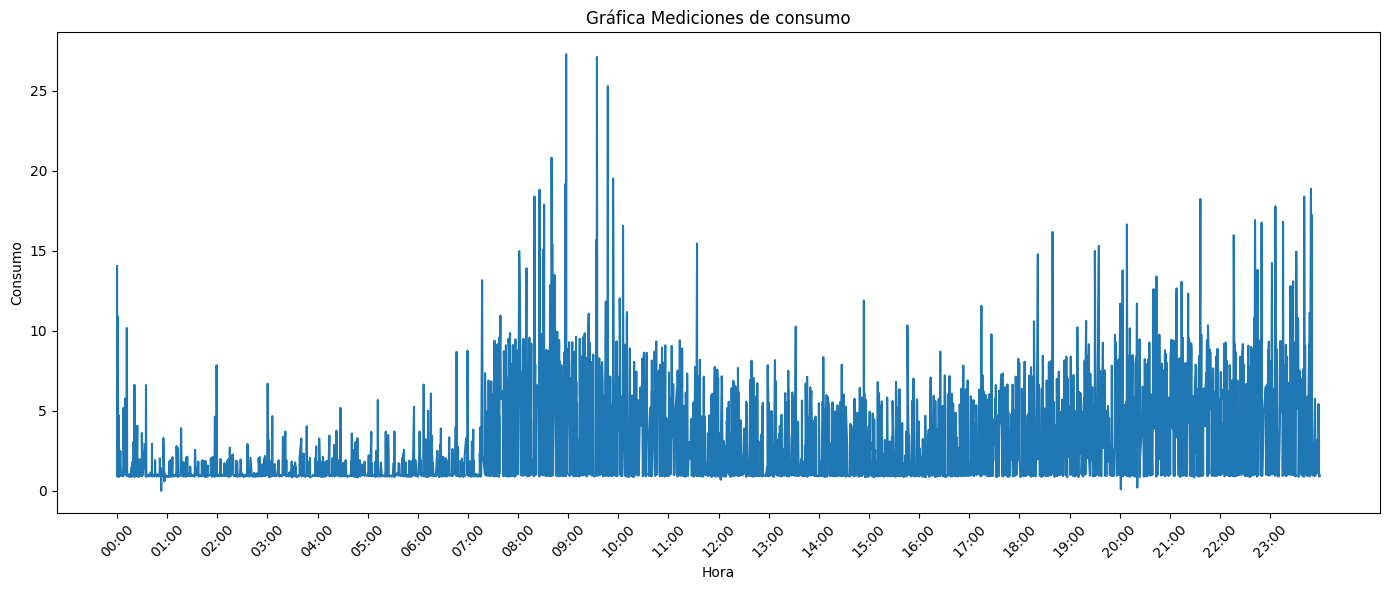

In [ ]:
todo['TiempoconOtroFormato'] = pd.to_datetime(todo['Tiempo'], format='%H:%M:%S')

plt.figure(figsize=(14, 6))
plt.plot(todo['TiempoconOtroFormato'], todo['Consumption'], linestyle="solid")  # Puedes cambiar el estilo de línea si lo deseas

# Configurar etiquetas y títulos (opcional)
plt.xlabel("Hora")
plt.ylabel("Consumo")
plt.title("Gráfica Mediciones de consumo")

# Configura las etiquetas del eje x con formato de hora
labels = pd.date_range(todo['TiempoconOtroFormato'].iloc[0], todo['TiempoconOtroFormato'].iloc[-1], freq='60T').strftime('%H:%M')
plt.xticks(pd.date_range(todo['TiempoconOtroFormato'].iloc[0], todo['TiempoconOtroFormato'].iloc[-1], freq='60T'), labels, rotation=45)

# Muestra la gráfica
plt.tight_layout()
plt.show()


Parece haber bajo uso de de energía hasta las 7:30 más o menos, después aumenta bastante y se mantiene alto el consumo hasta las 11 aproximadamente. Los picos más altos de enregía parecen encontrarse entre las 8 y 11 am. Visualmente se puede pensar que existen periodos de tiempo en los que hay periodicidad por lo que se realizarán periodos para revisar si verdaderamente se encuentra periodicidad. Se tienen un total de 3606 datos, por lo que se dividirán los datos arbitrariamente en 4 grupos de 765, puesto que se podrá tener de esta manera una distribución de horas que irá alrededor de 6 horas por periodo. Aunque existe la posibilidad de que no sean 6 horas exactas, puesto que esto depende de los registros que se hicieron

In [ ]:
hora,y=(todo["Tiempo"],todo["Consumption"])#Ponemos nombres de variables a los datos


In [ ]:
def encaje_takens(y,embedding_time_delay_periodic,embedding_dimension_periodic,stride=1):

    embedder_periodic = SingleTakensEmbedding(
        parameters_type="fixed",
        n_jobs=2,
        time_delay=embedding_time_delay_periodic,
        dimension=embedding_dimension_periodic,
        stride=stride,
    )

    y_periodic_embedded = embedder_periodic.fit_transform(y)
    return y_periodic_embedded

In [ ]:
import numpy as np
import gudhi as gd

# Supongamos que 'consumo' es tu columna de datos y 'hora' es la hora del día
consumo = todo['Consumption']
hora = todo['Tiempo']

# Prepara tus datos
points = [[h, c] for h, c in zip(hora, consumo)]

# Crea un complejo simplicial de Rips a partir de los datos
rips_complex = gd.RipsComplex(points=points, max_edge_length=2)

# Crea un complejo simplicial abstracto a partir del complejo de Rips
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcula la homología persistente
diag = simplex_tree.persistence()

# Crea el diagrama de persistencia
gd.plot_persistence_diagram(diag)
plt.show()
